# Temperature rise due to x-rays 

Useful websites:

https://en.wikipedia.org/wiki/Water_(data_page)

http://henke.lbl.gov/optical_constants/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
E  = 9.5            # photon energy (keV)
s  = 4e-6           # focus (FWHM)
t  = 50*1e-6        # thickness (m)
Q0 = 1e-6           # incident energy after Si(111) (J)
eV = 1.6e-19        # 1 eV in Joules
RT = 295            # temperature in the hutch

In [3]:
def temperature_rise(s, t, T, Cp, rho, Q0, eV):
    N = Q0/(eV*E*1e3)     # number of photons per pulse

    V = np.pi*(s/2.)**2*t # volume

    m = rho*V
    Q = Q0*(1-T) 
    DT = Q/m/Cp           #temperature rise

    #print('Incident Energy: %2f e9 photons/pulse' %(float(N)/1e9))
    #print('Temperature rise: %.2f K ' %DT)
    #print('Energy density: %.2f MJ/kg'% float(Q/m/1e6))
    
    return DT

### For pure water 

In [4]:
T  = 0.97068        # transmission of water 
Cp = 4181.4         # heat capacity at 25 °C         J/(kg*K)
rho= 0.9970479*1e3  # density  at 25 °C              kg/m3

dT_w = temperature_rise(s, t, T, Cp, rho, Q0, eV)

### For pure DMSO 

In [5]:
T_dmso  = 0.87113        # transmission of DMSO 
Cp_dmso = 3054           # heat capacity at 25 °C         J/(kg*K)
rho_dmso= 1.1*1e3        # density  at 25 °C              kg/m3

dT_dmso = temperature_rise(s, t, T_dmso, Cp_dmso, rho_dmso, Q0, eV)

### Plot

In [49]:
Q0_ = np.linspace(0.,2,10)*1e-6

dT = temperature_rise(s, t, T, Cp, rho, Q0_, eV)
dT_dmso = temperature_rise(s, t, T_dmso, Cp_dmso, rho_dmso, Q0_, eV)

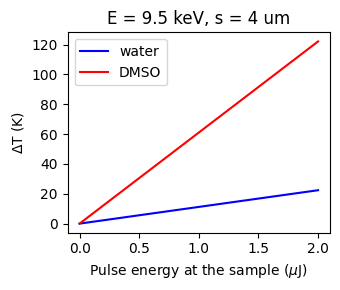

In [55]:
plt.figure(figsize=[3.5,3])
plt.plot(Q0_*1e6,dT,label=r'water',c='blue')
plt.plot(Q0_*1e6,dT_dmso,label=r'DMSO',c='red')

plt.xlabel(r'Pulse energy at the sample ($\mu$J)')
plt.ylabel(r'$\Delta$T (K)')
#plt.axhline(y=373,c='blue',ls='--')
#plt.axhline(y=189+273,c='red',ls='--')
#plt.grid()
plt.legend(frameon=True,loc='upper left', prop={'size': 10})
plt.title(r'E = %.1f keV, s = %i um'%(E, s*1e6))
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig_T.png',dpi=300)

plt.show()
